## Build a linear regression model for the dataset ‘electric_motor.csv’. Comment on the results



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('pmsm_temperature_data(1).csv')

In [3]:
df

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
998065,-0.047497,0.341638,0.331475,-1.246114,-1.222428,-0.255640,1.029142,-0.245723,0.429853,1.018568,0.836084,0.494725,72
998066,-0.048839,0.320022,0.331701,-1.250655,-1.222437,-0.255640,1.029148,-0.245736,0.429751,1.013416,0.834438,0.494279,72
998067,-0.042350,0.307415,0.330946,-1.246852,-1.222430,-0.255640,1.029191,-0.245701,0.429439,1.002906,0.833936,0.492666,72
998068,-0.039433,0.302082,0.330987,-1.249505,-1.222432,-0.255640,1.029147,-0.245727,0.429558,0.999157,0.830504,0.490581,72


In [4]:
df.describe()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
count,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000
mean,-0.003905,0.004723,0.004780,-0.005690,-0.006336,-0.003333,0.006043,-0.003194,-0.004396,0.000609,-0.002208,-0.003935,50.732001
std,0.993127,1.002423,0.997878,1.002330,1.001229,0.997907,0.998994,0.997912,0.995686,1.001049,0.999597,0.998343,22.073125
min,-8.573954,-1.429349,-1.655373,-1.861463,-1.371529,-3.345953,-3.245874,-3.341639,-2.631991,-1.834688,-2.066143,-2.019973,4.000000
25%,-0.599385,-1.037925,-0.826359,-0.927390,-0.951892,-0.266917,-0.756296,-0.257269,-0.672308,-0.747265,-0.761951,-0.725622,32.000000
50%,0.266157,-0.177187,0.267542,-0.099818,-0.140246,-0.187246,0.213935,-0.190076,0.094367,-0.057226,0.005085,0.006536,56.000000
75%,0.686675,0.650709,0.358491,0.852625,0.853584,0.547171,1.013975,0.499260,0.680691,0.697344,0.772239,0.725660,68.000000
max,2.967117,2.649032,2.274734,1.793498,2.024164,3.016971,1.060937,2.914185,2.917456,2.449158,2.326668,2.653781,81.000000


In [5]:
df.isnull().sum()

ambient           0
coolant           0
u_d               0
u_q               0
motor_speed       0
torque            0
i_d               0
i_q               0
pm                0
stator_yoke       0
stator_tooth      0
stator_winding    0
profile_id        0
dtype: int64

<AxesSubplot:>

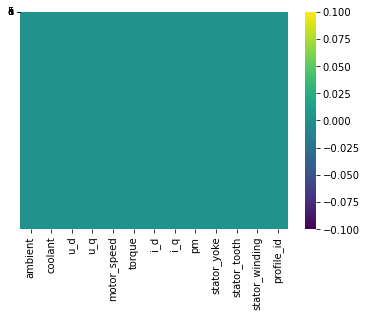

In [7]:
sns.heatmap(df.isnull(),yticklabels="False",cmap='viridis')

In [8]:
df.shape

(998070, 13)

In [9]:
#checking for duplicates

print('Number of duplicate entries in the dataset {}'.format(sum(df.duplicated())))

Number of duplicate entries in the dataset 0


## Differenciating dependent and independent variables

In [3]:
X=pd.DataFrame(df.drop(['motor_speed'],axis=1))
y= df.motor_speed.values.astype(object)

In [7]:
print(X)

         ambient   coolant       u_d       u_q    torque       i_d       i_q  \
0      -0.752143 -1.118446  0.327935 -1.297858 -0.250182  1.029572 -0.245860   
1      -0.771263 -1.117021  0.329665 -1.297686 -0.249133  1.029509 -0.245832   
2      -0.782892 -1.116681  0.332771 -1.301822 -0.249431  1.029448 -0.245818   
3      -0.780935 -1.116764  0.333700 -1.301852 -0.248636  1.032845 -0.246955   
4      -0.774043 -1.116775  0.335206 -1.303118 -0.248701  1.031807 -0.246610   
...          ...       ...       ...       ...       ...       ...       ...   
998065 -0.047497  0.341638  0.331475 -1.246114 -0.255640  1.029142 -0.245723   
998066 -0.048839  0.320022  0.331701 -1.250655 -0.255640  1.029148 -0.245736   
998067 -0.042350  0.307415  0.330946 -1.246852 -0.255640  1.029191 -0.245701   
998068 -0.039433  0.302082  0.330987 -1.249505 -0.255640  1.029147 -0.245727   
998069 -0.043803  0.312666  0.330830 -1.246590 -0.255640  1.029141 -0.245722   

              pm  stator_yoke  stator_t

In [8]:
print(y)

[-1.2224282 -1.2224293 -1.2224278 ... -1.2224296 -1.222432 -1.2224313]


In [6]:
X.shape , y.shape

((998070, 12), (998070,))

## Standard scalar

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
X=scaler.fit_transform(X)

In [11]:
print(X)

[[-0.75341625 -1.12045388  0.32384208 ... -2.06476719 -2.01744231
  -2.11714577]
 [-0.77266885 -1.11903183  0.32557536 ... -2.06348257 -2.01704034
  -2.11714577]
 [-0.78437773 -1.11869335  0.32868866 ... -2.06269656 -2.01675207
  -2.11714577]
 ...
 [-0.03871069  0.30196085  0.32685895 ...  0.83648055  0.49742538
   0.96352508]
 [-0.03577363  0.29664037  0.32690032 ...  0.83304777  0.49533692
   0.96352508]
 [-0.04017317  0.30719908  0.32674256 ...  0.83058818  0.49413635
   0.96352508]]


## Splitting the data into training and test data

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 100)

In [13]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (698649, 12)
X_test (299421, 12)
y_train (698649,)
y_test (299421,)


## Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model = LinearRegression()

In [17]:
model.fit(X_train, y_train)
LinearRegression()

LinearRegression()

In [19]:
model = LinearRegression().fit(X_train, y_train)

In [20]:
r_sq = model.score(X_test, y_test)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.9282945883729184


In [21]:
print(f"intercept: {model.intercept_}")

intercept: -0.00630096103923807


In [22]:
print(f"slope: {model.coef_}")

slope: [-0.0486571   0.41129662 -0.16453114  0.54023382 -0.34089699 -0.65716435
  0.13557794  0.10517463 -1.62732414  2.31649651 -1.16654618 -0.00486198]


In [23]:
# Making predictions using the predict() and xTest data
predictions = model.predict(X_test)

In [24]:
comparison = pd.DataFrame({'Predicted Values':predictions,'Actual Values':y_test})

In [25]:
print(comparison.head(10))

   Predicted Values Actual Values
0         -0.468799     -0.793821
1         -0.487384     -0.319742
2         -1.187428      -1.22243
3         -0.301096     -0.410786
4          1.217943      1.547961
5         -1.400881     -1.222431
6         -0.010068      -0.16189
7         -0.396517     -0.410791
8          0.865404      1.583806
9          1.225762      1.547964
